Importing packages and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv(r'data\train.csv')

Fill in missing data

In [3]:
#Get a summary of the data, see how many na values there are
#df.head()
#df.info()
#df.isnull().sum()

#Use the average age of male and female passengers to fill in empty age values
df.loc[df['Sex']=='female', 'Age'] = df.loc[df['Sex'] =='female', 'Age'].fillna(df.groupby(['Sex']).mean().at['female', 'Age'])
df.loc[df['Sex']=='male', 'Age'] = df.loc[df['Sex'] =='male', 'Age'].fillna(df.groupby(['Sex']).mean().at['male', 'Age'])
#Remove cabin column since too many are missing
df.drop(columns=['Cabin'], inplace=True)
#Use most frequent values to fill in embarked column
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Exploratory Data Analysis

c:\Users\xiazh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

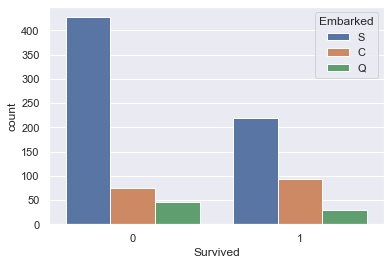

In [4]:
#Data summary for numerical variables
df.describe()
#Data summary for categorical variables
df['Survived'].value_counts()
df['Sex'].value_counts()
df['Embarked'].value_counts()

#Visualization
sns.set_theme()
#sns.countplot('Survived', hue="Sex", data=df)
#sns.countplot('Pclass', hue="Sex", data=df)
sns.countplot('Survived', hue="Embarked", data=df)

Preparing data for training

In [10]:
#Numbers are assigned based on frequency of value. e.g. male is more frequent than female so male=0, female=1
#Machine Learning Models can not work on categorical variables in the form of strings,  need to change it into numerical form
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

#Separate features and target
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
Y = df['Survived']

#Split data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Training the model

In [12]:
model = LogisticRegression()
model.fit(X_train, Y_train)

c:\Users\xiazh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Testing the model

In [16]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Training data accuracy score: ", training_data_accuracy)

X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Testing data accuracy score: ", testing_data_accuracy)

Training data accuracy score:  0.8033707865168539
Testing data accuracy score:  0.7988826815642458
